torch.Size([100, 1, 28, 28]) torch.Size([100])


SystemExit: 

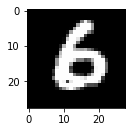

In [5]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

import sys

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter("runs/mnist")

#device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = 784
hidden_size = 100
num_classes = 10

num_epochs = 2

batch_size = 100
learning_rate = 0.001

train_dataset = torchvision.datasets.MNIST(root = './data', train=True, transform = transforms.ToTensor(), \
                                           download = True)

test_dataset = torchvision.datasets.MNIST(root = './data', train=False, transform = transforms.ToTensor(), \
                                           download = True)

batch_size = 100
learning_rate = 0.001

train_loader = DataLoader(dataset=train_dataset, batch_size =batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset,  batch_size =batch_size, shuffle = False)

examples = iter(train_loader)
samples, labels = next(examples)

print(samples.shape, labels.shape)

#samples[0]

for i in range(1):
    plt.subplot(2, 3, i+1)
    #print(samples[i][0])
    plt.imshow(samples[i][0], cmap='gray')

#for tensor board
# img_grid = torchvision.utils.make_grid(samples)
# writer.add_image('mnist_images',img_grid)
# writer.close()
# sys.exit()

class NeuralNet(nn.Module):
    
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        #don't apply softmax as we will use Cross entropy loss
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes)

#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        
        #re-shape images from 28X28 to 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        #forward pass
        y_pred = model(images)
        
        #loss and optimizer
        loss = criterion(y_pred, labels)
        loss.backward()
        
        optimizer.step()
        
        optimizer.zero_grad()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps} loss = {loss.item():.4f}')
            
            
            
#testing and evaluation
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        
        output = model(images)
        
        # value, index
        _, predictions = torch.max(output, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
        #labels = labels.to(device)
    
    acc = 100*n_correct/n_samples
    print(f'accuracy: {acc}')

In [1]:
for data_set_size in [500, 1000, 2000, 4000, 8000, 16000, 32000, 60000]:
    print(data_set_size)

500
1000
2000
4000
8000
16000
32000
60000
